In [1]:
import numpy as np

from matplotlib import pyplot as plt

In [2]:
klin, plin = np.loadtxt('Pk_Planck15_Table4.txt', unpack=True)

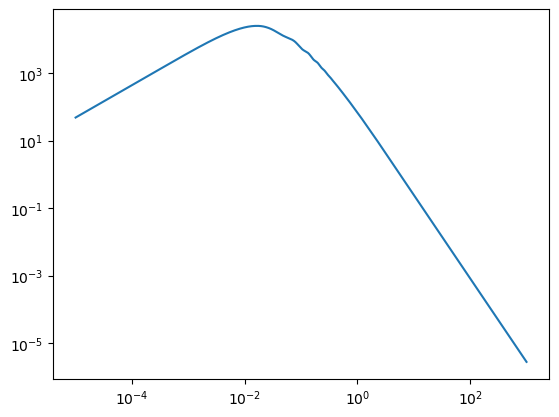

In [3]:
from Utils.loginterp_jax import loginterp_jax

kint = np.logspace(-5,3,2000)
pint = loginterp_jax(klin,plin)(kint)

plt.loglog(kint, pint)

In [4]:
from Utils.spherical_bessel_transform import SphericalBesselTransform as SBT

In [5]:
sph = SBT(kint,fourier=True)

In [6]:
rr, xi0 = sph.sph(0,pint)

(0.0, 200.0)

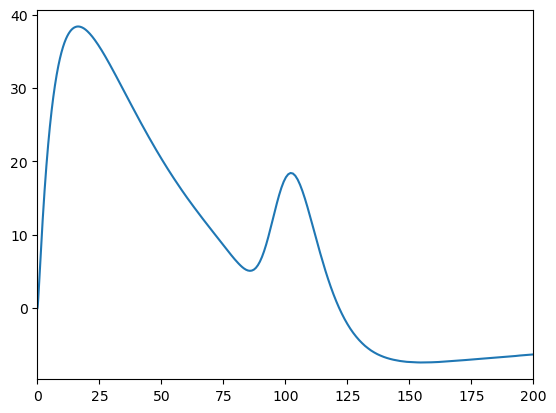

In [7]:
plt.plot(rr, rr**2 * xi0)

plt.xlim(0,200)

In [8]:
from Utils.qfuncfft_jax import QFuncFFT_JAX

In [9]:
qfunc = QFuncFFT_JAX(kint, pint * np.exp(-(kint/10)**2))

/var/folders/17/l69g7ffd4fvf7lz7l15h__p00000gq/T/ipykernel_81241/2044610804.py:2: RuntimeWarning: overflow encountered in power
  plt.semilogx(qfunc.k, 3/7**qfunc.k*qfunc.R1)


(0.001, 1)

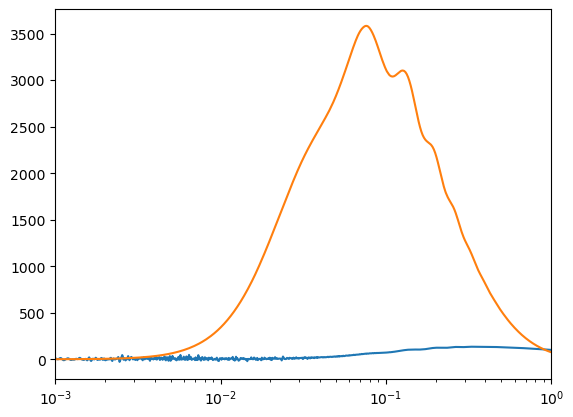

In [28]:
plt.semilogx(qfunc.k, qfunc.k*qfunc.Rb3*qfunc.p)
plt.semilogx(qfunc.k, 3/7**qfunc.k*qfunc.R1)

plt.xlim(1e-3,1)